#### Continuous state space
    Many robotic control applications, including the lunar lander application that you work on in the practice lab, have continuous state spaces. Let's take a look at what that means and how to generalize the concept we've talked about until now with Mars rover to these continuous state spaces. 
    
    A simplified Mars rover example we use, has a discrete set of states, and what that means is that simplify Mars rover could only be in one of six possible positions. But most robots can be in more than one of six or any discrete number of positions, instead, they can be in any of a very large number of continuous value positions. 
    
    For example, if the Mars rover could be anywhere on a line, so its position was indicated by a number ranging from 0-6 kilometers where any number in between is valid. That would be an example of a continuous state space, because the position would be represented by a number such as that is 2.7 kilometers along or 4.8 kilometers or any other number between zero and six. 
    
    Let's look at another example, the application of controlling a car or a truck. If you're building a self-driving car or self-driving truck and you want to control this to drive smoothly, then the state of this truck might include a few numbers such as this, x position, its y position, maybe it's orientation. What way is it facing? Assuming the truck stays on the ground, you probably don't need to worry about how tall is, how high up it is. This is state will include x, y, and is angle Theta, as well as maybe its speeds in x-direction, the speed in the y-direction, and how quickly it's turning. Is it turning at one degree per second or is it turning at 30 degrees per second or is it turning really quickly at 90 degrees per second? For a truck or a car, the state might include not just one number, like how many kilometers of this along on this line, but they might includes six numbers, is x position, is y position, is orientation, which I'm going to denote using Greek alphabet Theta, as well its velocity in the x-direction, which I will denote using x dot, so that means how quickly is this x-coordinate changing, y dot how quickly is the y coordinate changing, and then finally, Theta dot, which is how quickly is the angle of the car changing. 
    
    Whereas for the simplified Mars rover example, the state was just one of six possible numbers. It could be one, two, three, four, five or six. For the car, the state would comprise this vector of six numbers, and any of these numbers can take on any value within is valid range. For example, Theta should range between zero and 360 degrees.
    
            state = [x
                     y
                     θ
                     x^
                     y^
                     θ^]
                     
     So any continuous state reinforcement learning problem or a continuous state Markov decision process, continuously MTP, the state of the problem isn't just one of a small number of possible discrete values, like a number from 1-6. Instead, it's a vector of numbers, any of which could take any of a large number of values.

#### Lunar landar
    
    The lunar lander lets you land a simulated vehicle on the moon. It's like a fun little video game that's been used by a lot of reinforcement learning researchers. Let's take a look at what it is. In this application you're in command of a lunar lander that is rapidly approaching the surface of the moon. And your job is the fire thrusters at the appropriate times to land it safely on the landing pad. 
    
    To give you a sense of what it looks like. This is the lunar lander landing successfully and it's firing thrusters downward and to the left and right to position itself to land between these two yellow flags. Or if the reinforcement landing algorithm policy does not do well then the lander unfortunately be trashed on the surface of the moon. 
    
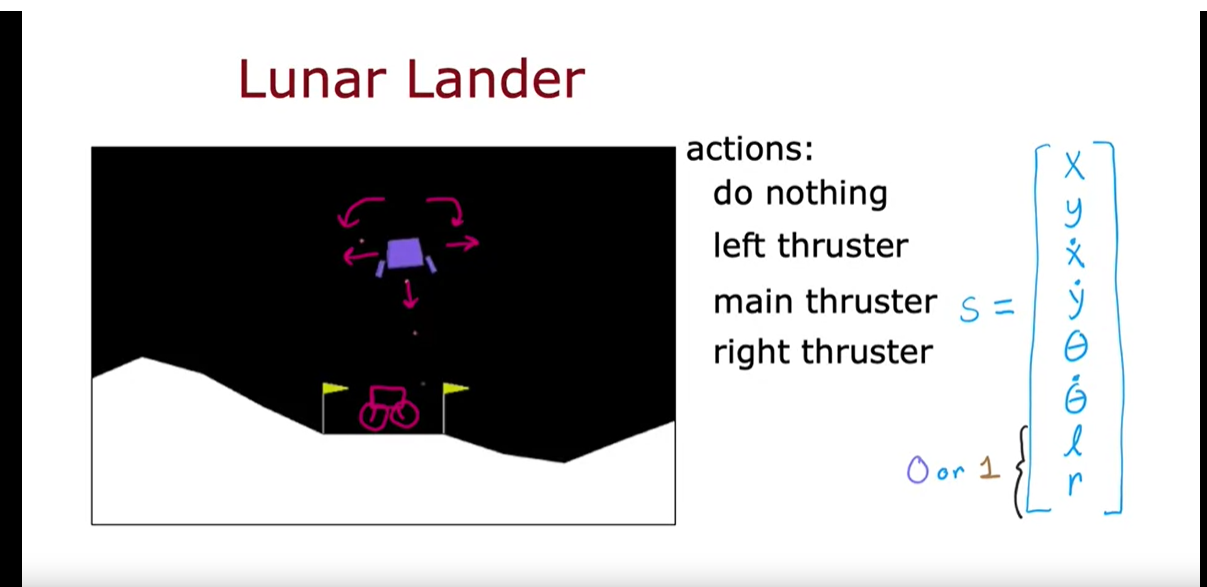
    
    In this application you have four possible actions on every time step. You could either do nothing, in which case the forces of inertia and gravity pull you towards the surface of the moon. Or you can fire a left thruster when you see a little red dot come out on the left, that's firing the left. They'll tend to push the lunar lander to the right or you can fire the main engine that's thrusting down the bottom here. Or you can fire the right thruster and that's firing the right thruster which will push you to the left and your job is to keep on picking actions over time, so that the lunar lander safely lands between these two flags here on the landing pad. 
    
    In order to give the actions a shorter name I'm sometimes going to call the actions "nothing" meaning do nothing or "left" meaning farther left thruster or "main" meaning fire the main engine downward or "right". 
    
    So I'm going to call the actions [nothing, left, main, right] for short. 
    
    How about the states of this Mtp?
        The states are its position X and Y, which represent how far to the left or right and how high up is it, as well as x' and y' denotes velocity at x, y how fast is it moving in the horizontal and vertical directions and then, also is angle, θ, so how far is the lunar lander tilted to the left or tilted to the right? θ' is the angular velocity.
        
        And then finally, because a small difference in positioning makes a big difference in whether or not it's landed, we're going to have two other variables in the state vector which we call "l" and "r",  which corresponds to whether the left leg is grounded, meaning whether or not the left leg is sitting on the ground as well as r which corresponds to whether or not the right leg is sitting on the ground. 
        
        So whereas x, y x', y', θ, θ' are any numbers, l and r will be binary valued and can take on only values zero or one depending on whether the left and right legs are touching the ground. 

#### Reward function for Lunar lander
     Finally this is the reward function for the lunar lander. 
     
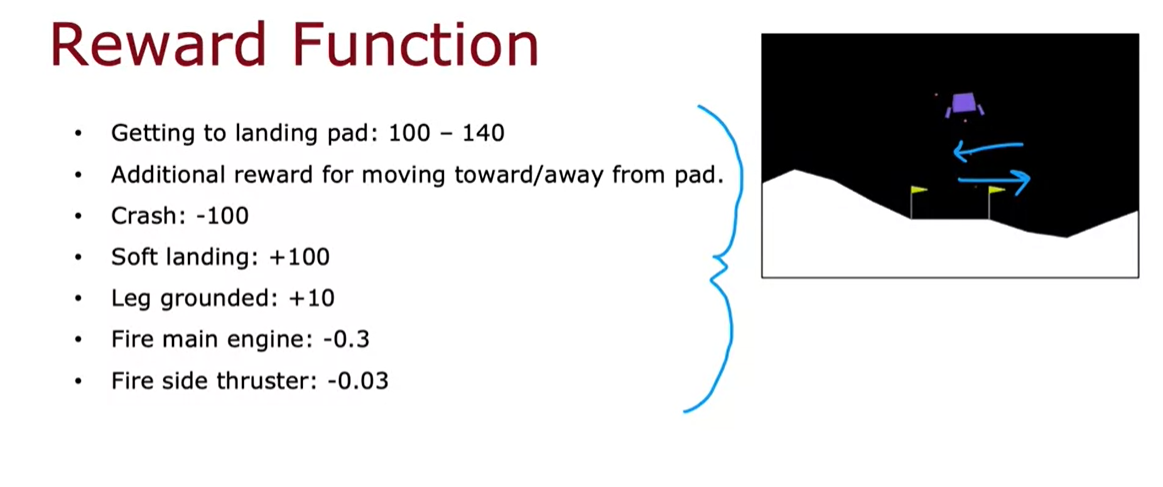

    If it manages to get to the landing pad, it receives the reward between 100 and 140 depending on how well it's flown when gotten to the center of the landing pad. 
    
    We also give it an additional reward for moving toward or away from the pad so it moves closer to the pad it receives a positive reward and it moves away and drifts away, it receives a negative reward. If it crashes it gets a large -100 reward, it achieves a soft landing, that is a landing without crash, it gets a +100 reward.
    
    For each leg, the left leg or the right leg that it gets grounded, it receives a +10 reward and finally to encourage it not to waste too much fuel and fire thrusters aren't necessarily, every time it fires the main engine we give it a -0.3 rewards and every time it fires the left or the right side thrusters we give it a -0.03 reward. 
    
    Notice that this is a moderately complex reward function. The designers of the lunar lander application actually put some thought into exactly what behavior you want and codified it in the reward function.
    
    To incentivize more of the behaviors you want and fear of the behaviors like crashing that you don't want, You 'd find when you're building your own reinforcement learning application usually takes some thought to specify exactly what you want or don't want and to codify that in the reward function. 
    
    But specify the reward function should still turn out to be much easier than to specify the exact right action to take from every single state, which is much harder for this and many other reinforcement learning applications. 
    
    

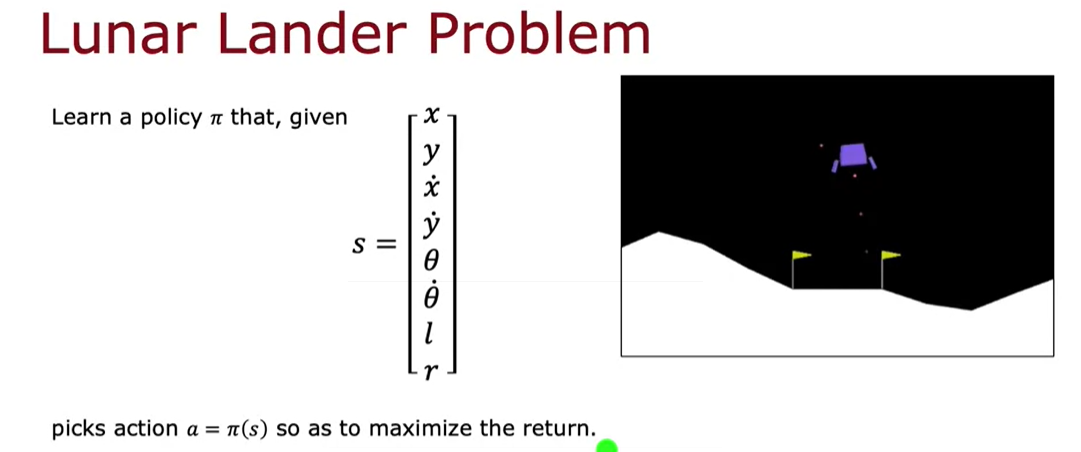

    So the lunar lander problem is as follows. Our goal is to learn a policy pi. That when given a state S as written here,
    
    picks an action a equals pi(S) so as to maximize the return, the sum of discounted rewards. 
    
    And usually for the lunar lander would use a fairly large value for gamma close to 1 i.e 0.985. 
    
    And if you can learn a policy pi that does this, then you successfully land this lunar lander exciting application.
    
    We're now finally ready to develop a learning algorithm which will turn out to use deep learning or neural networks to come up with a policy to land the lunar lander.

### Deep Reinforcement Learning Algorithm or Deep Q Network
###### (Learning Q function or Learning State action value function)
    
    The key idea is that we're going to train a neural network to compute/learn or to approximate the state action value function    
    
    Q( s, a) and that in turn will let us pick good actions. Let's see how it works.
    
    
    The heart of the learning algorithm is we're going to train a neural network that inputs the current state and the current action and computes or approximates Q(s, a). 
    
    In particular, for the Lunar Lander, we're going to take the state s and any action a and put them together. 
    
    Concretely, the state was that list of eight numbers that we saw previously, so you have x, y, x', y', θ, θ', l, r that describe the state. 
    
    Then finally, we have four possible actions: nothing, left, main, a main engine, and right. We can encode any of those four actions using a one-hot feature vector. If action were the first action, we may encode it using 1, 0, 0, 0 or if it was the second action to find the left cluster, we may encode it as 0, 1, 0, 0. 
    
    This list of 12 numbers, eight numbers for the state and then four numbers, a one-hot encoding of the action is the inputs we'll have to the neural network, and I'm going to call this input X. 
    
    We'll then take these 12 numbers and feed them to a neural network with say, 64 units in the first hidden layer, 64 units in the second hidden layer, and then a single output in the output layer. 
    
    The job of the neural network is the output Q(s, a) i.e the state action-value function for the Lunar Lander given the input s and a. 
    
    Because we'll be using neural network training algorithms in a little bit, I'm also going to refer to this value Q(s, a) as the target value Y that were training the neural network to approximate. 
    
    Notice that I did say reinforcement learning is different from supervised learning, but what we're going to do is not input a state and have it output an action. What we're going to do is input a state action pair and have it try to output Q (s, a), and using a neural network inside the reinforcement learning algorithm this way will turn out to work pretty well. 
    
    We'll see the details in a little bit so don't worry about it if it doesn't make sense yet. But if you can train a neural network with appropriate choices of parameters in the hidden layers and in the outer layer to give you a good estimates of Q(s, a), then whenever you're Lunar Lander is in some state s, you can then use the neural network to compute Q(s, a). 
    
    For all four actions, you can compute Q(s, nothing), Q(s, left), Q(s, main), Q(s, right), and then finally, whichever of these has the highest value, you pick the corresponding action a. 
    
    For example, if out of these four values, Q(s, main) is largest, then you would decide to go and fire the main engine of the Lunar Lander. 
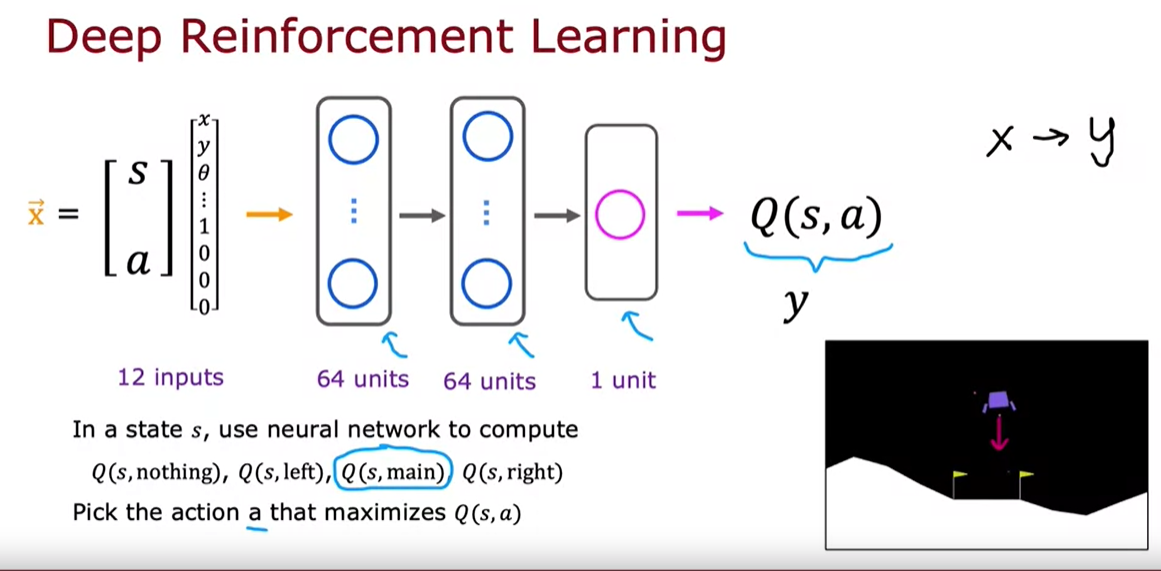    
    
    The question becomes, how do you train a neural network to output Q(s, a)? 
    
            It turns out the approach will be to use Bellman's equations to create a training set with lots of examples, (X, y) , and then we'll use supervised learning exactly as you learned in the second course when we talked about neural networks. To learn using supervised learning, a mapping from x to y, that is a mapping from the state action pair to this target value Q( s, a). 
            
     But how do you get the training set with values for (X , y) that you can then train a neural network on? 
     
    
    


##### Algorithm

    Here's the Bellman equation, 
        
                        Q(s, a) = R(s) + γ max of a' Q(s', a')
        
        The right-hand side is what you want Q( s, a) , so I'm going to call this value on the right-hand side y and the input to the neural network is a state and an action pair so I'm going to call that X. 
        
        The job of the neural network is to take input x, that is input the state action pair, and try to accurately predict what will be the value on the right. 
        
        In supervised learning, we were training a neural network to learn a function f(w, b), which depends on a bunch of parameters, w, b, the parameters of the various layers of the neural network and it was the job of the neural network to find a function that approximiates or closely maps input x to the target value y. 
        
        The question is, how can we come up with a training set with values (X , y) for a new network to learn from. 
        
        Here's what we're going to do. We're going to use the lunar lander and just try taking different actions in it. If we don't have a good policy yet, we'll take actions randomly left, right , main engine, do nothing. 
        
        By just trying out different things in the lunar lander simulator we'll observe a lot of examples of when we're in some state and we took some action, may be a good action, maybe a terrible action either way. Then we got some reward R(s) for being in that state, and as a result of our action, we got to some new state, S'.
        
        As you take different actions in the lunar lander, you see this (s, a, R(s), s'), and we call these tuples multiples times for every state and every action.
         
         It turns out that each of these tuples will be enough to create a single training example, (x1, y1). In particular, here's how you do it. There are four elements in this first tuple. The first two will be used to compute x1, and the second two would be used to compute y1 using bellman's equation
 
        Let's take a look at what a full algorithm for learning the Q-function is like. First, we're going to take our neural network and initialize all the parameters of the neural network randomly. Initially we have no idea, what is a Q function, let's just pick totally random values. We'll pretend that this neural network is our initial random guess for the Q-function. 
        
        This is a little bit like when you are training linear regression and you initialize all the parameters randomly and then use gradient descent to improve the parameters. Initializing it randomly for now is fine. What's important is whether the algorithm can slowly improve the parameters to get a better estimate. Next, we will repeatedly do the following; We will take actions in the lunar lander, so float around randomly, take some good actions, take some bad actions. It's okay either way. But you get lots of these tuples.
        
        What we will do is store to 10,000 most recent examples of these tuples and this recent examples are also called "Replay Buffer". As you run this algorithm, you will see many steps in the lunar lander, maybe hundreds of thousands of steps. But to make sure we don't end up using excessive computer memory, common practice is to just remember the 10,000 most recent such tuples that we saw taking actions in the MTP. This technique of storing the most recent examples only is sometimes called the replay buffer in reinforcement learning algorithm. 

![Deep%20Q%20Network.png](attachment:Deep%20Q%20Network.png)
    
        
        For now, we're just flying the lunar lander randomly, sometimes crashing, sometimes not and getting these tuples as experienced for our learning algorithm. 
        Occasionally then we will train the neural network using replay buffer while collecting the examples.
        
        In order to train the neural network, here's what we'll do. We'll look at these 10,000 most recent tuples we had saved and create a training set of 10,000 examples. Training set needs lots of pairs of (x , y). 
        
        The target value that we want a neural network to try to predict would be y  which is equal to R(s) + γ max of a' Q(s', a'). How do we get this value of Q? randomly initally
        
        Well, initially is this neural network that we had randomly initialized. It may not be a very good guess, but it's a guess.
        
        After creating these 10,000 training examples we'll have training examples x1, y1 through x10,000, y10,000. 
        
        We'll train a neural network and I'm going to call the new neural network Q_new, such that Q_new( s, a ) learns to approximate y. Think Q_new is just a function f(w, b) that approximates input x target y our neural network learned. We use metrics like MSE to train the network.
        
        Now, this neural network should be a slightly better estimates of what the Q function or the state action value function should be. Now we will update our initial Q with this new Q neural network trained on and then we keep repeat this experiment.
        
       Then by doing this over and over, taking lots of actions, training a model, that will improve your guess for the Q-function. As you run this algorithm on every iteration, Q(s', a') hopefully becomes an even better estimate of the Q function so that when you run the algorithm long enough, this will actually become a pretty good estimate of the true value of Q(s, a), so that you can then use this to pick, hopefully good actions of the MDP. 
       
       The algorithm you just saw is sometimes called the DQN algorithm which stands for Deep Q-Network because you're using deep learning and neural network to train a model to learn the Q functions. Hence DQN or DQ using a neural network. 
       
       If you use the algorithm as I described it, it will work, okay, on the lunar lander. Maybe it'll take a long time to converge, maybe it won't land perfectly, but it'll work. But it turns out that with a couple of refinements to the algorithm, it can work much better. 

     One refinement is, send only the state s of 8 values and predict the outputs of all four actions by adding 4 outputs at the output layer and use softmax layer.  This is done bcoz, after taining, while doing inference, we have to carry out the inference 4 times for all the 4 actions to find out the max Q value if the output is single unit. Hence adding 4 output units(i.e units equal to number of actions) at the training itself will reduce the computation during inference steps.
![Refinement%20of%20Deep%20Q%20network.png](attachment:Refinement%20of%20Deep%20Q%20network.png)

#### Epsilon greedy policy
    Another refinement is using epsilon-greedy policy.
    
    One step in learning algorithm is "Take random action in the lunar landar simulator"
    
    But how do we know what is the best action that we could take at a state? While we are still learning the Q function and dont have a very good estimate of Q(s,a) to take the action? bcuz taking actions purely randomly may result in bad Q function ultimately.
       
    Epsilon helps to choose actions even when we are still learning the Q function. It uses the exploration and exploitation strategy
    
    1. Pick actions based on the current Q that it learned so far, eventhough it is not a great estimate of Q(s, a). Use it to guide to take action (may be good guidance) rather than totally random
    
    2. Using exploration and exploitation strategy(ususualy ppl follow this )
        Exploitation - most of the time(95% of the time) choose action a that maximizes current Q(s, a)
        Exploration - (5% of the time) choose action randomly
![epsilon%20greedy%20policy.png](attachment:epsilon%20greedy%20policy.png)        
        
       Why do we want to occasionally pick an action randomly? 
            
            Suppose there's some strange reason that Q(s,a) was initialized randomly so that the learning algorithm thinks that firing the main thruster is never a good idea. Maybe the neural network parameters were initialized so that Q(s, main) is always very low. If that's the case, then the neural network, because it's trying to pick the action a that maximizes Q(s,a), it will never ever try firing the main thruster. Because it never ever tries firing the main thruster, it will never learn that firing the main thruster is actually sometimes a good idea. Because of the random initialization, if the neural network somehow initially gets stuck in this mind that some things are bad idea, just by chance, then option 1, it means that it will never try out those actions and discover that maybe is actually a good idea to take that action, like fire the main thrusters sometimes. Under option 2 on every step, we have some small probability of trying out different actions so that the neural network can learn to overcome its own possible preconceptions about what might be a bad idea that turns out not to be the case. This idea of picking actions randomly is sometimes called an "exploration step". Because we're going to try out something that may not be the best idea, but we're going to just try out some action in some circumstances, explore and learn more about an action in the circumstance where we may not have had as much experience before. 
        
        Taking an action that maximizes Q(s,a), sometimes this is called a "greedy action" because we're trying to actually maximize our return by picking this. Or in the reinforcement learning literature, sometimes you'll also hear this as an "exploitation step". 
        
        In the reinforcement learning literature, sometimes you hear people talk about the exploration versus exploitation trade-off, which refers to how often do you take actions randomly or take actions that may not be the best in order to learn more, versus trying to maximize your return by say, taking the action that maximizes Q (s,a). 
        
        This approach, that is option 2, has a name, is called an "Epsilon-greedy policy", where here Epsilon is 0.05 is the probability of picking an action randomly. This is the most common way to make your reinforcement learning algorithm explore a little bit, even whilst occasionally or maybe most of the time taking greedy actions. 
        
        By the way, lot of people have commented that the name Epsilon-greedy policy is confusing because you're actually being greedy 95 percent of the time, not five percent of the time. So maybe 1 minus Epsilon-greedy policy, because it's 95 percent greedy, five percent exploring, that's actually a more accurate description of the algorithm. But for historical reasons, the name Epsilon-greedy policy is what has stuck. This is the name that people use to refer to the policy that explores actually Epsilon fraction of the time rather than this greedy Epsilon fraction of the time. 
        
        Lastly, one of the trick that's sometimes used in reinforcement learning is to start off Epsilon high. Initially, you are taking random actions a lot at a time and then gradually decrease it, so that over time you are less likely to take actions randomly and more likely to use your improving estimates of the Q-function to pick good actions. 
        
        For example, in the lunar lander exercise, you might start off with Epsilon very, very high, maybe even Epsilon equals 1.0. You're just picking actions completely at random initially and then gradually decrease it all the way down to say 0.01, so that eventually you're taking greedy actions 99 percent of the time and acting randomly only a very small one percent of the time. 
        
        One of the things that I've noticed for reinforcement learning algorithm is that compared to supervised learning, they're more finicky in terms of the choice of hyper parameters. For example, in supervised learning, if you set the learning rate a little bit too small, then maybe the algorithm will take longer to learn. Maybe it takes three times as long to train, which is annoying, but maybe not that bad. Whereas in reinforcement learning, find that if you set the value of Epsilon not quite as well, or set other parameters not quite as well, it doesn't take three times as long to learn. It may take 10 times or a 100 times as long to learn. 
        
        Reinforcement learning algorithms, I think because they're are less mature than supervised learning algorithms, are much more finicky to little choices of parameters like that, and it actually sometimes is frankly more frustrating to tune these parameters with reinforcement learning algorithm compared to a supervised learning algorithm. 
        
       There are couple more algorithm refinements, mini batching, and also using soft updates. Even without these additional refinements, the algorithm will work okay, but these are additional refinements that make the algorithm run much faster. 
       
       

#### MIni batch learning and soft updates
    Another 2  refinements are performing 
            - soft updates
    
            - using mini batch(also applies to supervised learning) to avoid full scan of entire training examples that takes lot of time and less or small updates (small gradient steps for whole calculation of gradients for the entire examples). This makes the learning computation inexpensive and tends to almost reaches the global minimum
    
    Soft update
    -------------
    
        We are setting Q = Q_new in the algorithm.
        
        But it turns out that this can make a very abrupt change to Q. If you train a new neural network to new, maybe just by chance is not a very good neural network. Maybe is even a little bit worse than the old one, then you just overwrote your Q function with a potentially worse noisy neural network. The soft update method helps to prevent Q_new through just one unlucky step getting worse.
        
    Instead of updating the Q to be Q new after each training iteration, update Q only to take certain amount of Q new and retain the previous Q. This is done to avoid any abrupt changes in the new Q i,e if Q new is a bad estimation, this affect the existing previously well performed Q. So instead of hard update, update Q in a soft manner.
    
    In particular, the neural network Q will have some parameters, W and B, all the parameters for all the layers in the neural network. When you train the new neural network, you get some parameters W_new and B_new. In the original algorithm S [inaudible] on that slide, you would set W to be equal to W_new and B equals B_new. That's what set Q equals Q_new means. 
    
    With the soft update, what we do is instead Set W equals 0.01 times W_new plus 0.99 times W. 
    
    In other words, we're going to make W to be 99 percent the old version of W plus one percent of the new version W_new. 
    
    This is called a soft update because whenever we train a new neural network W_new, we're only going to accept a little bit of the new value. As similarly, B equals 0.01 times B_new plus 0.99 times B. These numbers, 0.01 and 0.99, these are hyperparameters that you could set, but it controls how aggressively you move W to W_new and these two numbers are expected to add up to one. 
    
    One extreme would be if you were to set W equals one times W_new plus 0 times W, in which case, you're back to the original algorithm up here where you're just copying W_new onto W.
    
    But a soft update allows you to make a more "gradual change to Q" or to the neural network parameters W and B that affect your current guess for the Q function Q of s, a. 
    
    It turns out that using the soft update method causes the reinforcement learning algorithm to converge more reliably. It makes it less likely that the reinforcement learning algorithm will oscillate or divert or have other undesirable properties.
    
    With these two final refinements to the algorithm, mini-batching, which actually applies very well to supervised learning as well, not just reinforcement learning, as well as the idea of soft updates, you should be able to get your lunar algorithm to work really well on the Lunar Lander. 
    
    The Lunar Lander is actually a decently complex, decently challenging application and so that you can get it to work and land safely on the moon.

    Question on soft update
    ------------------------
        Hi,

        In the lecture, one of the refinements for DQN was suggested to be a soft update of Q. And professor also mentioned that this can be applied to supervised learning algorithms.

        My question is, as we are using the neural network for learning and we have the cost function such as MSE to guide the learning process. Why can’t we use cross-validation for model evaluation and do the update as usual (Q = Qnew) instead of taking the soft update?

        How does the soft update helps also in supervised learning? For suppose if we consider supervised learning, params w, and b are updated and the updated model is evaluated against the cross-validation set. If the cost is increasing for any model, then we stop the training and stop updating the parameters. How does soft updating work in this scenario?

        When there is a cross-validation set, we will already get to know the model performance.

        So, if there is a cross-validation set, then the soft update is still necessary?

        If yes, why is the need to take a small percentage of the model when we know that model is performing badly on a cross-validation set?
    
    Answer
    ------
    The key missing piece here in your consideration is that we don’t necessary have a full, representative set of data in a reinforcement learning setting.

    In a reinforcement learning setting, we are facing a very large state and action space that we assume ourselves never going to have a full dataset for each of those state-action pair. Instead, due to the limitation of memory, we only remember a very small subspace of state-action. Consequently, each training to the model is done over an unrepresentative samples (that represents only a small subspace of state-action). In such case, if we train the model without soft-update, the model will soon shift itself completely to the small subspace described by the current training dataset AND will “forget” about the previous training dataset that represent a different subspace.

    Performing soft-update helps slow down the shifting, dragging the model back from learning so well the current training dataset in the hope that it will bias more on the previous experience.

    In contrast, in a usual supervised learning setting, we have a full dataset that is representative to the whole space of the problem, and then we randomly sample batches from the full dataset to perform training. The model is assumed to be always trained to learn on more or less the same distribution of data in the space of the problem. In a reinforcement learning setting, however, to repeat, we assume ourselves to not have that full dataset from the beginning.

# Deep Q-Learning - Lunar Lander

In this assignment, you will train an agent to land a lunar lander safely on a landing pad on the surface of the moon.


# Outline
- [ 1 - Import Packages <img align="Right" src="./images/lunar_lander.gif" width = 60% >](#1)
- [ 2 - Hyperparameters](#2)
- [ 3 - The Lunar Lander Environment](#3)
  - [ 3.1 Action Space](#3.1)
  - [ 3.2 Observation Space](#3.2)
  - [ 3.3 Rewards](#3.3)
  - [ 3.4 Episode Termination](#3.4)
- [ 4 - Load the Environment](#4)
- [ 5 - Interacting with the Gym Environment](#5)
    - [ 5.1 Exploring the Environment's Dynamics](#5.1)
- [ 6 - Deep Q-Learning](#6)
  - [ 6.1 Target Network](#6.1)
    - [ Exercise 1](#ex01)
  - [ 6.2 Experience Replay](#6.2)
- [ 7 - Deep Q-Learning Algorithm with Experience Replay](#7)
  - [ Exercise 2](#ex02)
- [ 8 - Update the Network Weights](#8)
- [ 9 - Train the Agent](#9)
- [ 10 - See the Trained Agent In Action](#10)
- [ 11 - Congratulations!](#11)
- [ 12 - References](#12)


<a name="1"></a>
## 1 - Import Packages

We'll make use of the following packages:
- `numpy` is a package for scientific computing in python.
- `deque` will be our data structure for our memory buffer.
- `namedtuple` will be used to store the experience tuples.
- The `gym` toolkit is a collection of environments that can be used to test reinforcement learning algorithms. We should note that in this notebook we are using `gym` version `0.24.0`.
- `PIL.Image` and `pyvirtualdisplay` are needed to render the Lunar Lander environment.
- We will use several modules from the `tensorflow.keras` framework for building deep learning models.

Run the cell below to import all the necessary packages.

In [1]:
import time
from collections import deque, namedtuple

import gym
import numpy as np
import pandas as pd
import PIL.Image
import tensorflow as tf

from pyvirtualdisplay import Display
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

In [2]:
# Set up a virtual display to render the Lunar Lander environment.
Display(visible=0, size=(840, 480)).start();

SEED = 0
# Set the random seed for TensorFlow
tf.random.set_seed(SEED)

<a name="2"></a>
## 2 - Hyperparameters

Run the cell below to set the hyperparameters.

In [3]:
MEMORY_SIZE = 100_000     # size of memory buffer
GAMMA = 0.995             # discount factor
ALPHA = 1e-3              # learning rate  
NUM_STEPS_FOR_UPDATE = 4  # perform a learning update every C time steps

<a name="3"></a>
## 3 - The Lunar Lander Environment
(Note: the gym library has issues with c++ compiler and box2D package from gym in windows os. CUrrently gym only supports mac. This code wont work in windows laptop unless u fix the installation of all the packages in gym)
https://towardsdatascience.com/how-to-render-openai-gym-on-windows-65767ab52ae2#:~:text=However%2C%20the%20Gym%20is%20designed,t%20work%20on%20Windows%20either.

In this notebook we will be using [OpenAI's Gym Library](https://www.gymlibrary.dev/). The Gym library provides a wide variety of environments for reinforcement learning. To put it simply, an environment represents a problem or task to be solved. In this notebook, we will try to solve the Lunar Lander environment using reinforcement learning.

The goal of the Lunar Lander environment is to land the lunar lander safely on the landing pad on the surface of the moon. The landing pad is designated by two flag poles and it is always at coordinates `(0,0)` but the lander is also allowed to land outside of the landing pad. The lander starts at the top center of the environment with a random initial force applied to its center of mass and has infinite fuel. The environment is considered solved if you get `200` points. 

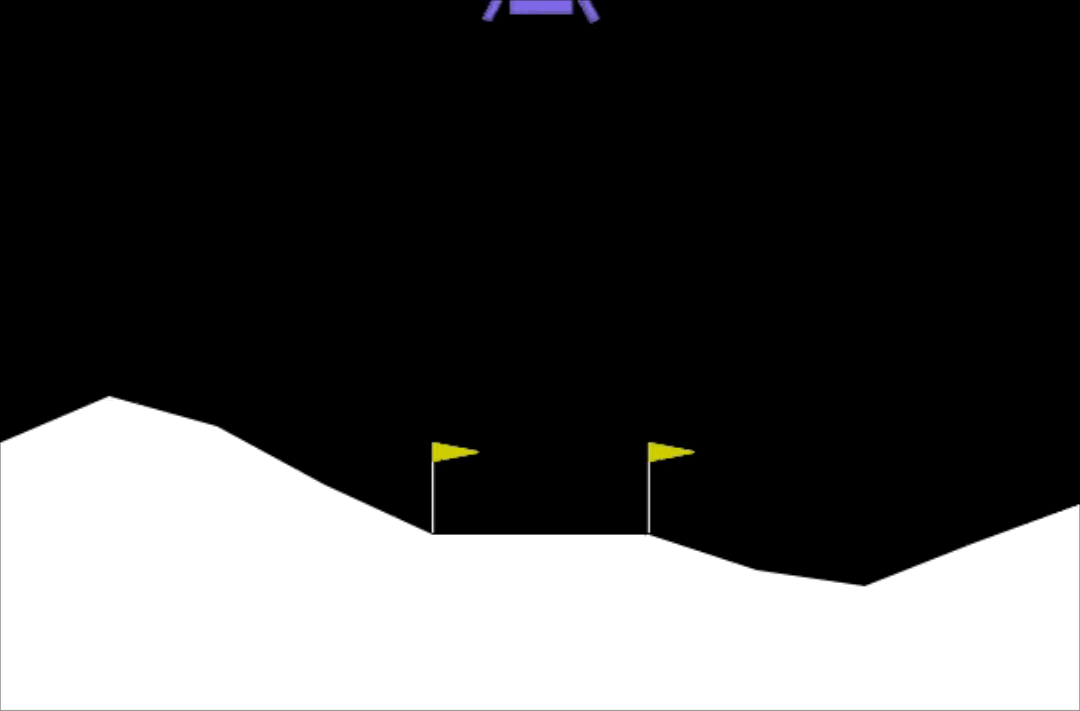
### 3.1 Action Space

The agent has four discrete actions available:

* Do nothing.
* Fire right engine.
* Fire main engine.
* Fire left engine.

Each action has a corresponding numerical value:

```python
Do nothing = 0
Fire right engine = 1
Fire main engine = 2
Fire left engine = 3
```

<a name="3.2"></a>
### 3.2 Observation Space

The agent's observation space consists of a state vector with 8 variables:

* Its $(x,y)$ coordinates. The landing pad is always at coordinates $(0,0)$.
* Its linear velocities $(\dot x,\dot y)$. velocity in x direction, velocity in y direction. Think x and y as x axis and y axis
* Its angle $\theta$.
* Its angular velocity $\dot \theta$.
* Two booleans, $l$ and $r$, that represent whether each leg is in contact with the ground or not.

<a name="3.3"></a>
### 3.3 Rewards

The Lunar Lander environment has the following reward system:

* Landing on the landing pad and coming to rest is about 100-140 points.
* If the lander moves away from the landing pad, it loses reward. 
* If the lander crashes, it receives -100 points.
* If the lander comes to rest, it receives +100 points.
* Each leg with ground contact is +10 points.
* Firing the main engine is -0.3 points each frame.
* Firing the side engine is -0.03 points each frame.

<a name="3.4"></a>
### 3.4 Episode Termination

An episode ends (i.e the environment enters a terminal state) if:

* The lunar lander crashes (i.e if the body of the lunar lander comes in contact with the surface of the moon).

* The lander's $x$-coordinate is greater than 1.

You can check out the [Open AI Gym documentation](https://www.gymlibrary.dev/environments/box2d/lunar_lander/) for a full description of the environment. 

<a name="4"></a>
## 4 - Load the Environment

We start by loading the `LunarLander-v2` environment from the `gym` library by using the `.make()` method. `LunarLander-v2` is the latest version of the Lunar Lander environment and you can read about its version history in the [Open AI Gym documentation](https://www.gymlibrary.dev/environments/box2d/lunar_lander/#version-history).

In [4]:
env = gym.make('LunarLander-v2')

Once we load the environment we use the `.reset()` method to reset the environment to the initial state. The lander starts at the top center of the environment and we can render the first frame of the environment by using the `.render()` method.

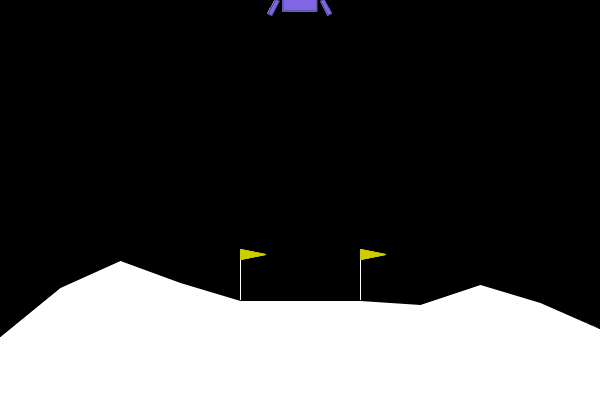

In [5]:
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

In order to build our neural network later on we need to know the size of the state vector and the number of valid actions. We can get this information from our environment by using the `.observation_space.shape` and `action_space.n` methods, respectively.

In [6]:
state_size = env.observation_space.shape
num_actions = env.action_space.n

print('State Shape:', state_size)
print('Number of actions:', num_actions)

State Shape: (8,)
Number of actions: 4


## 5 - Interacting with the Gym Environment

The Gym library implements the standard “agent-environment loop” formalism:

In [2]:
from IPython.display import Video

Video("./rl_formalism.m4v")

In the standard “agent-environment loop” formalism, an agent interacts with the environment in discrete time steps $t=0,1,2,...$. At each time step $t$, the agent uses a policy $\pi$ to select an action $A_t$ based on its observation of the environment's state $S_t$. The agent receives a numerical reward $R_t$ and on the next time step, moves to a new state $S_{t+1}$.

<a name="5.1"></a>
### 5.1 Exploring the Environment's Dynamics

In Open AI's Gym environments, we use the `.step()` method to run a single time step of the environment's dynamics. In the version of `gym` that we are using the `.step()` method accepts an action and returns four values:

* `observation` (**object**): an environment-specific object representing your observation of the environment. In the Lunar Lander environment this corresponds to a numpy array containing the positions and velocities of the lander as described in section [3.2 Observation Space](#3.2).


* `reward` (**float**): amount of reward returned as a result of taking the given action. In the Lunar Lander environment this corresponds to a float of type `numpy.float64` as described in section [3.3 Rewards](#3.3).


* `done` (**boolean**): When done is `True`, it indicates the episode has terminated and it’s time to reset the environment. 


* `info` (**dictionary**): diagnostic information useful for debugging. We won't be using this variable in this notebook but it is shown here for completeness.

To begin an episode, we need to reset the environment to an initial state. We do this by using the `.reset()` method. 

In [7]:
# Reset the environment and get the initial state.
initial_state = env.reset()

Once the environment is reset, the agent can start taking actions in the environment by using the `.step()` method. Note that the agent can only take one action per time step. 

In the cell below you can select different actions and see how the returned values change depending on the action taken. Remember that in this environment the agent has four discrete actions available and we specify them in code by using their corresponding numerical value:

```python
Do nothing = 0
Fire right engine = 1
Fire main engine = 2
Fire left engine = 3
```

In [ ]:
from itertools import zip_longest
from statsmodels.iolib.table import SimpleTable

def display_table(initial_state, action, next_state, reward, done):
    """
    Displays a table containing the initial state, action, next state, reward, and done
    values from Gym's Lunar Lander environment.

    All floating point numbers in the table are displayed rounded to 3 decimal places
    and actions are displayed using their labels instead of their numerical value (i.e
    if action = 0, the action will be printed as "Do nothing" instead of "0").

    Args:
        initial_state (numpy.ndarray):
            The initial state vector returned when resetting the Lunar Lander
            environment, i.e the value returned by the env.reset() method.
        action (int):
            The action taken by the agent. In the Lunar Lander environment, actions are
            represented by integers in the closed interval [0,3] corresponding to:
                - Do nothing = 0
                - Fire right engine = 1
                - Fire main engine = 2
                - Fire left engine = 3
        next_state (numpy.ndarray):
            The state vector returned by the Lunar Lander environment after the agent
            takes an action, i.e the observation returned after running a single time
            step of the environment's dynamics using env.step(action).
        reward (numpy.float64):
            The reward returned by the Lunar Lander environment after the agent takes an
            action, i.e the reward returned after running a single time step of the
            environment's dynamics using env.step(action).
        done (bool):
            The done value returned by the Lunar Lander environment after the agent
            takes an action, i.e the done value returned after running a single time
            step of the environment's dynamics using env.step(action).
    
    Returns:
        table (statsmodels.iolib.table.SimpleTable):
            A table object containing the initial_state, action, next_state, reward,
            and done values. This will result in the table being displayed in the
            Jupyter Notebook.
    """

    action_labels = [
        "Do nothing",
        "Fire right engine",
        "Fire main engine",
        "Fire left engine",
    ]

    # Do not use column headers.
    column_headers = None

    # Display all floating point numbers rounded to 3 decimal places.
    with np.printoptions(formatter={"float": "{:.3f}".format}):
        table_info = [
            ("Initial State:", [f"{initial_state}"]),
            ("Action:", [f"{action_labels[action]}"]),
            ("Next State:", [f"{next_state}"]),
            ("Reward Received:", [f"{reward:.3f}"]),
            ("Episode Terminated:", [f"{done}"]),
        ]

    # Generate table.
    row_labels, data = zip_longest(*table_info)
    table = SimpleTable(data, column_headers, row_labels)

    return table

In [8]:
# Select an action
action = 0

# Run a single time step of the environment's dynamics with the given action.
next_state, reward, done, _ = env.step(action)

display_table(initial_state, action, next_state, reward, done)

Initial State:,[0.002 1.422 0.194 0.506 -0.002 -0.044 0.000 0.000]
Action:,Do nothing
Next State:,[0.004 1.433 0.194 0.480 -0.004 -0.044 0.000 0.000]
Reward Received:,1.104
Episode Terminated:,False


In practice, when we train the agent we use a loop to allow the agent to take many consecutive actions during an episode.

<a name="6"></a>
## 6 - Deep Q-Learning

In cases where both the state and action space are discrete we can estimate the action-value function iteratively by using the Bellman equation:

$$
Q_{i+1}(s,a) = R + \gamma \max_{a'}Q_i(s',a')
$$

This iterative method converges to the optimal action-value function $Q^*(s,a)$ as $i\to\infty$. This means that the agent just needs to gradually explore the state-action space and keep updating the estimate of $Q(s,a)$ until it converges to the optimal action-value function $Q^*(s,a)$. However, in cases where the state space is continuous it becomes practically impossible to explore the entire state-action space. Consequently, this also makes it practically impossible to gradually estimate $Q(s,a)$ until it converges to $Q^*(s,a)$.

In the Deep $Q$-Learning, we solve this problem by using a neural network to estimate the action-value function $Q(s,a)\approx Q^*(s,a)$. We call this neural network a $Q$-Network and it can be trained by adjusting its weights at each iteration to minimize the mean-squared error in the Bellman equation.

Unfortunately, using neural networks in reinforcement learning to estimate action-value functions has proven to be highly unstable. Luckily, there's a couple of techniques that can be employed to avoid instabilities. These techniques consist of using a ***Target Network*** and ***Experience Replay***. We will explore these two techniques in the following sections.

<a name="6.1"></a>
### 6.1 Target Network

We can train the $Q$-Network by adjusting it's weights at each iteration to minimize the mean-squared error in the Bellman equation, where the target values are given by:

$$
y = R + \gamma \max_{a'}Q(s',a';w)
$$

where $w$ are the weights of the $Q$-Network. This means that we are adjusting the weights $w$ at each iteration to minimize the following error:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}Q(s',a'; w)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

Notice that this forms a problem because the $y$ target is changing on every iteration. Having a constantly moving target can lead to oscillations and instabilities. To avoid this, we can create
a separate neural network for generating the $y$ targets. We call this separate neural network the **target $\hat Q$-Network** and it will have the same architecture as the original $Q$-Network. By using the target $\hat Q$-Network, the above error becomes:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}\hat{Q}(s',a'; w^-)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

where $w^-$ and $w$ are the weights the target $\hat Q$-Network and $Q$-Network, respectively.

In practice, we will use the following algorithm: every $C$ time steps we will use the $\hat Q$-Network to generate the $y$ targets and update the weights of the target $\hat Q$-Network using the weights of the $Q$-Network. We will update the weights $w^-$ of the the target $\hat Q$-Network using a **soft update**. This means that we will update the weights $w^-$ using the following rule:
 
$$
w^-\leftarrow \tau w + (1 - \tau) w^-
$$

where $\tau\ll 1$. By using the soft update, we are ensuring that the target values, $y$, change slowly, which greatly improves the stability of our learning algorithm.


#### Some more info on target network

The target network is a separate neural network that is used to estimate the target values for the Q-learning update rule. It is a copy of the main network, but its parameters are updated less frequently, which helps stabilize the learning process.

Using a single neural network for both estimating the current Q-values and updating the target Q-values can lead to instability in the learning process. This is because the network’s parameters are constantly changing, causing the target values to shift as well. To address this issue, the concept of a target network is introduced.

The target network is a separate neural network that is periodically updated with the parameters of the main Q-network. This means that the target values used for the Q-learning update rule remain more stable, allowing for a more stable learning process. For example, consider a reinforcement learning problem where an agent is learning to navigate a maze. The agent uses a Q-network to estimate the Q-values for each possible action in its current state. To update the Q-values, the agent also needs to estimate the target Q-values for the next state. Instead of using the same Q-network for this purpose, the agent uses a separate target network, which is updated less frequently. This helps stabilize the learning process and allows the agent to learn more effectively.

In summary, a target network is a separate neural network used in deep reinforcement learning algorithms to stabilize the learning process. It is a copy of the main Q-network, but its parameters are updated less frequently, providing more stable target values for the Q-learning update rule.

<a name="ex01"></a>
### Exercise 1

In this exercise you will create the $Q$ and target $\hat Q$ networks and set the optimizer. Remember that the Deep $Q$-Network (DQN) is a neural network that approximates the action-value function $Q(s,a)\approx Q^*(s,a)$. It does this by learning how to map states to $Q$ values.

To solve the Lunar Lander environment, we are going to employ a DQN with the following architecture:

* An `Input` layer that takes `state_size` as input.

* A `Dense` layer with `64` units and a `relu` activation function.

* A `Dense` layer with `64` units and a `relu` activation function.

* A `Dense` layer with `num_actions` units and a `linear` activation function. This will be the output layer of our network.


In the cell below you should create the $Q$-Network and the target $\hat Q$-Network using the model architecture described above. Remember that both the $Q$-Network and the target $\hat Q$-Network have the same architecture.

Lastly, you should set `Adam` as the optimizer with a learning rate equal to `ALPHA`. Recall that `ALPHA` was defined in the [Hyperparameters](#2) section. We should note that for this exercise you should use the already imported packages:
```python
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
```

In [10]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Create the Q-Network
q_network = Sequential([
    Input(state_size),
    Dense(64, "relu"),
    Dense(64, "relu"),
    Dense(num_actions, "linear"),
    ])

# Create the target Q^-Network
target_q_network = Sequential([
    Input(state_size),
    Dense(64, "relu"),
    Dense(64, "relu"),
    Dense(num_actions, "linear"),
    ])


optimizer = Adam()

<a name="6.2"></a>
### 6.2 Experience Replay

When an agent interacts with the environment, the states, actions, and rewards the agent experiences are sequential by nature. If the agent tries to learn from these consecutive experiences it can run into problems due to the strong correlations between them. To avoid this, we employ a technique known as **Experience Replay** to generate uncorrelated experiences for training our agent. Experience replay consists of storing the agent's experiences (i.e the states, actions, and rewards the agent receives) in a memory buffer and then sampling a random mini-batch of experiences from the buffer to do the learning. The experience tuples $(S_t, A_t, R_t, S_{t+1})$ will be added to the memory buffer at each time step as the agent interacts with the environment.

For convenience, we will store the experiences as named tuples.

In [12]:
# Store experiences as named tuples
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

By using experience replay we avoid problematic correlations, oscillations and instabilities. In addition, experience replay also allows the agent to potentially use the same experience in multiple weight updates, which increases data efficiency.

## 7 - Deep Q-Learning Algorithm with Experience Replay

Now that we know all the techniques that we are going to use, we can put them together to arrive at the Deep Q-Learning Algorithm With Experience Replay.
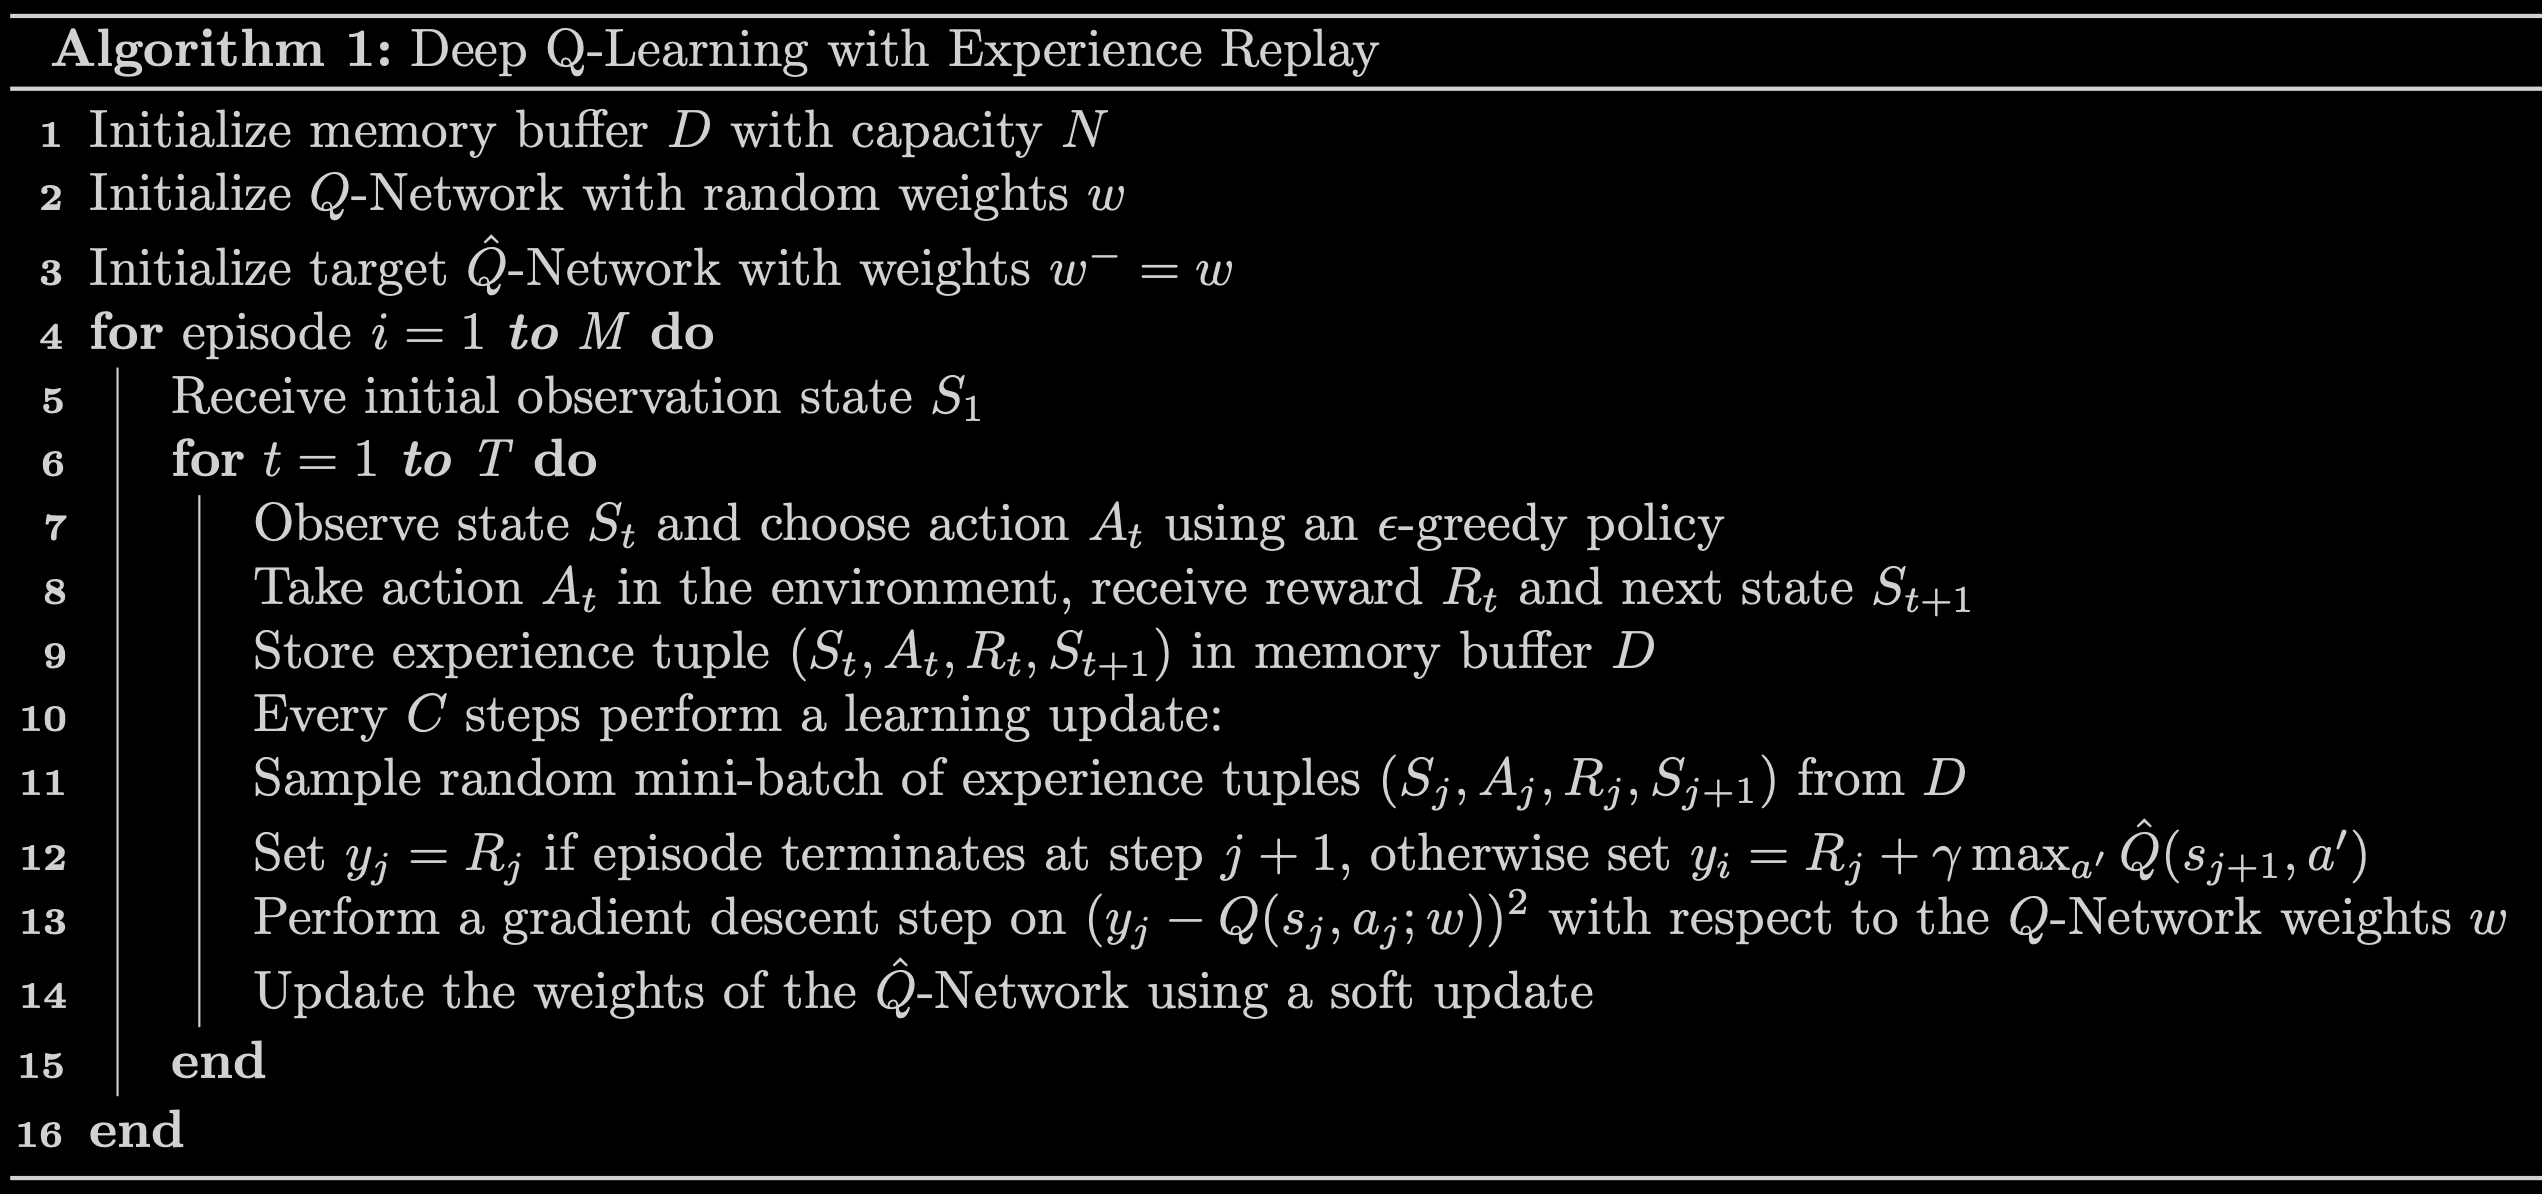

<a name="ex02"></a>
### Exercise 2

In this exercise you will implement line ***12*** of the algorithm outlined in *Fig 3* above and you will also compute the loss between the $y$ targets and the $Q(s,a)$ values. In the cell below, complete the `compute_loss` function by setting the $y$ targets equal to:

$$
\begin{equation}
    y_j =
    \begin{cases}
      R_j & \text{if episode terminates at step  } j+1\\
      R_j + \gamma \max_{a'}\hat{Q}(s_{j+1},a') & \text{otherwise}\\
    \end{cases}       
\end{equation}
$$

Here are a couple of things to note:

* The `compute_loss` function takes in a mini-batch of experience tuples. This mini-batch of experience tuples is unpacked to extract the `states`, `actions`, `rewards`, `next_states`, and `done_vals`. You should keep in mind that these variables are *TensorFlow Tensors* whose size will depend on the mini-batch size. For example, if the mini-batch size is `64` then both `rewards` and `done_vals` will be TensorFlow Tensors with `64` elements.


* Using `if/else` statements to set the $y$ targets will not work when the variables are tensors with many elements. However, notice that you can use the `done_vals` to implement the above in a single line of code. To do this, recall that the `done` variable is a Boolean variable that takes the value `True` when an episode terminates at step $j+1$ and it is `False` otherwise. Taking into account that a Boolean value of `True` has the numerical value of `1` and a Boolean value of `False` has the numerical value of `0`, you can use the factor `(1 - done_vals)` to implement the above in a single line of code. Here's a hint: notice that `(1 - done_vals)` has a value of `0` when `done_vals` is `True` and a value of `1` when `done_vals` is `False`. 

Lastly, compute the loss by calculating the Mean-Squared Error (`MSE`) between the `y_targets` and the `q_values`. To calculate the mean-squared error you should use the already imported package `MSE`:
```python
from tensorflow.keras.losses import MSE
```

In [13]:
from tensorflow.keras.losses import MSE

def compute_loss(experiences, gamma, q_network, target_q_network):
    """ 
    Calculates the loss.
    
    Args:
      experiences: (tuple) tuple of ["state", "action", "reward", "next_state", "done"] namedtuples
      gamma: (float) The discount factor.
      q_network: (tf.keras.Sequential) Keras model for predicting the q_values
      target_q_network: (tf.keras.Sequential) Keras model for predicting the targets
          
    Returns:
      loss: (TensorFlow Tensor(shape=(0,), dtype=int32)) the Mean-Squared Error between
            the y targets from the target network before C timestep and the Q(s,a) values from the q network after C time steps
    """
    
    # Unpack the mini-batch of experience tuples
    states, actions, rewards, next_states, done_vals = experiences
    
    # Compute max Q^(s,a)
    max_qsa = tf.reduce_max(target_q_network(next_states), axis=-1)
    
    # Set y = R if episode terminates, otherwise set y = R + γ max Q^(s,a).
    y_targets = rewards + (gamma * max_qsa * (1 - done_vals))
    
    # Get the q_values
    q_values = q_network(states)
    q_values = tf.gather_nd(q_values, tf.stack([tf.range(q_values.shape[0]),
                                                tf.cast(actions, tf.int32)], axis=1))
        
    # Compute the loss
    loss = MSE(y_targets, q_values) 
    
    return loss

In [ ]:
#gather_nd() example
#You provide a tensor and indices representing locations in that tensor. It returns the elements of the tensor corresponding to the indices you provide.


import tensorflow as tf
sess = tf.Session()
x = [[1,2,3],[4,5,6]] #imagine this as a tensor
y = tf.gather_nd(x, [[1,1],[1,2]]) #(tensor, indices to access the slices of tensor)
print(sess.run(y)) # [5, 6]
[1, 1] -> represents tensor 1 index 1
[1, 2] -> represents tensor 1 index 2


<a name="8"></a>
## 8 - Update the Network Weights

We will use the `agent_learn` function below to implement lines ***12 -14*** of the algorithm outlined in [Fig 3](#7). The `agent_learn` function will update the weights of the $Q$ and target $\hat Q$ networks using a custom training loop. Because we are using a custom training loop we need to retrieve the gradients via a `tf.GradientTape` instance, and then call `optimizer.apply_gradients()` to update the weights of our $Q$-Network. Note that we are also using the `@tf.function` decorator to increase performance. Without this decorator our training will take twice as long. If you would like to know more about how to increase performance with `@tf.function` take a look at the [TensorFlow documentation] (https://www.tensorflow.org/guide/function). https://www.tensorflow.org/guide/basics

The last line of this function updates the weights of the target $\hat Q$-Network using a [soft update](#6.1). If you want to know how this is implemented in code we encourage you to take a look at the `update_target_network` function.

In [15]:
TAU = 1e-3  # Soft update parameter.

def update_target_network(q_network, target_q_network):
    """
    Updates the weights of the target Q-Network using a soft update.
    
    The weights of the target_q_network are updated using the soft update rule:
    
                    w_target = (TAU * w) + (1 - TAU) * w_target
    
    where w_target are the weights of the target_q_network, TAU is the soft update
    parameter, and w are the weights of the q_network.
    
    Args:
        q_network (tf.keras.Sequential): 
            The Q-Network. 
        target_q_network (tf.keras.Sequential):
            The Target Q-Network.
    """

    for target_weights, q_net_weights in zip(
        target_q_network.weights, q_network.weights
    ):
        target_weights.assign(TAU * q_net_weights + (1.0 - TAU) * target_weights) #soft update

@tf.function
def agent_learn(experiences, gamma):
    """
    Updates the weights of the Q networks.
    
    Args:
      experiences: (tuple) tuple of ["state", "action", "reward", "next_state", "done"] namedtuples
      gamma: (float) The discount factor.
    
    """
    
    # Calculate the loss
    with tf.GradientTape() as tape:
        loss = compute_loss(experiences, gamma, q_network, target_q_network)

    # Get the gradients of the loss with respect to the weights.
    gradients = tape.gradient(loss, q_network.trainable_variables)
    
    # Update the weights of the q_network.
    optimizer.apply_gradients(zip(gradients, q_network.trainable_variables))

    # update the weights of target q_network
    update_target_network(q_network, target_q_network)

<a name="9"></a>
## 9 - Train the Agent

We are now ready to train our agent to solve the Lunar Lander environment. In the cell below we will implement the algorithm in [Fig 3](#7) line by line (please note that we have included the same algorithm below for easy reference. This will prevent you from scrolling up and down the notebook):

* **Line 1**: We initialize the `memory_buffer` with a capacity of $N =$ `MEMORY_SIZE`. Notice that we are using a `deque` as the data structure for our `memory_buffer`.


* **Line 2**: We skip this line since we already initialized the `q_network` in [Exercise 1](#ex01).


* **Line 3**: We initialize the `target_q_network` by setting its weights to be equal to those of the `q_network`.


* **Line 4**: We start the outer loop. Notice that we have set $M =$ `num_episodes = 2000`. This number is reasonable because the agent should be able to solve the Lunar Lander environment in less than `2000` episodes using this notebook's default parameters.


* **Line 5**: We use the `.reset()` method to reset the environment to the initial state and get the initial state.


* **Line 6**: We start the inner loop. Notice that we have set $T =$ `max_num_timesteps = 1000`. This means that the episode will automatically terminate if the episode hasn't terminated after `1000` time steps.


* **Line 7**: The agent observes the current `state` and chooses an `action` using an $\epsilon$-greedy policy. Our agent starts out using a value of $\epsilon =$ `epsilon = 1` which yields an $\epsilon$-greedy policy that is equivalent to the equiprobable random policy. This means that at the beginning of our training, the agent is just going to take random actions regardless of the observed `state`. As training progresses we will decrease the value of $\epsilon$ slowly towards a minimum value using a given $\epsilon$-decay rate. We want this minimum value to be close to zero because a value of $\epsilon = 0$ will yield an $\epsilon$-greedy policy that is equivalent to the greedy policy. This means that towards the end of training, the agent will lean towards selecting the `action` that it believes (based on its past experiences) will maximize $Q(s,a)$. We will set the minimum $\epsilon$ value to be `0.01` and not exactly 0 because we always want to keep a little bit of exploration during training. If you want to know how this is implemented in code we encourage you to take a look at the `get_action` function.


* **Line 8**: We use the `.step()` method to take the given `action` in the environment and get the `reward` and the `next_state`. 


* **Line 9**: We store the `experience(state, action, reward, next_state, done)` tuple in our `memory_buffer`. Notice that we also store the `done` variable so that we can keep track of when an episode terminates. This allowed us to set the $y$ targets in [Exercise 2](#ex02).


* **Line 10**: We check if the conditions are met to perform a learning update. We do this by using our custom `check_update_conditions` function. This function checks if $C =$ `NUM_STEPS_FOR_UPDATE = 4` time steps have occured and if our `memory_buffer` has enough experience tuples to fill a mini-batch. For example, if the mini-batch size is `64`, then our `memory_buffer` should have at least `64` experience tuples in order to pass the latter condition. If the conditions are met, then the `check_update_conditions` function will return a value of `True`, otherwise it will return a value of `False`.


* **Lines 11 - 14**: If the `update` variable is `True` then we perform a learning update. The learning update consists of sampling a random mini-batch of experience tuples from our `memory_buffer`, setting the $y$ targets, performing gradient descent, and updating the weights of the networks. We will use the `agent_learn` function we defined in [Section 8](#8) to perform the latter 3.


* **Line 15**: At the end of each iteration of the inner loop we set `next_state` as our new `state` so that the loop can start again from this new state. In addition, we check if the episode has reached a terminal state (i.e we check if `done = True`). If a terminal state has been reached, then we break out of the inner loop.


* **Line 16**: At the end of each iteration of the outer loop we update the value of $\epsilon$, and check if the environment has been solved. We consider that the environment has been solved if the agent receives an average of `200` points in the last `100` episodes. If the environment has not been solved we continue the outer loop and start a new episode.

Finally, we wanted to note that we have included some extra variables to keep track of the total number of points the agent received in each episode. This will help us determine if the agent has solved the environment and it will also allow us to see how our agent performed during training. We also use the `time` module to measure how long the training takes. 

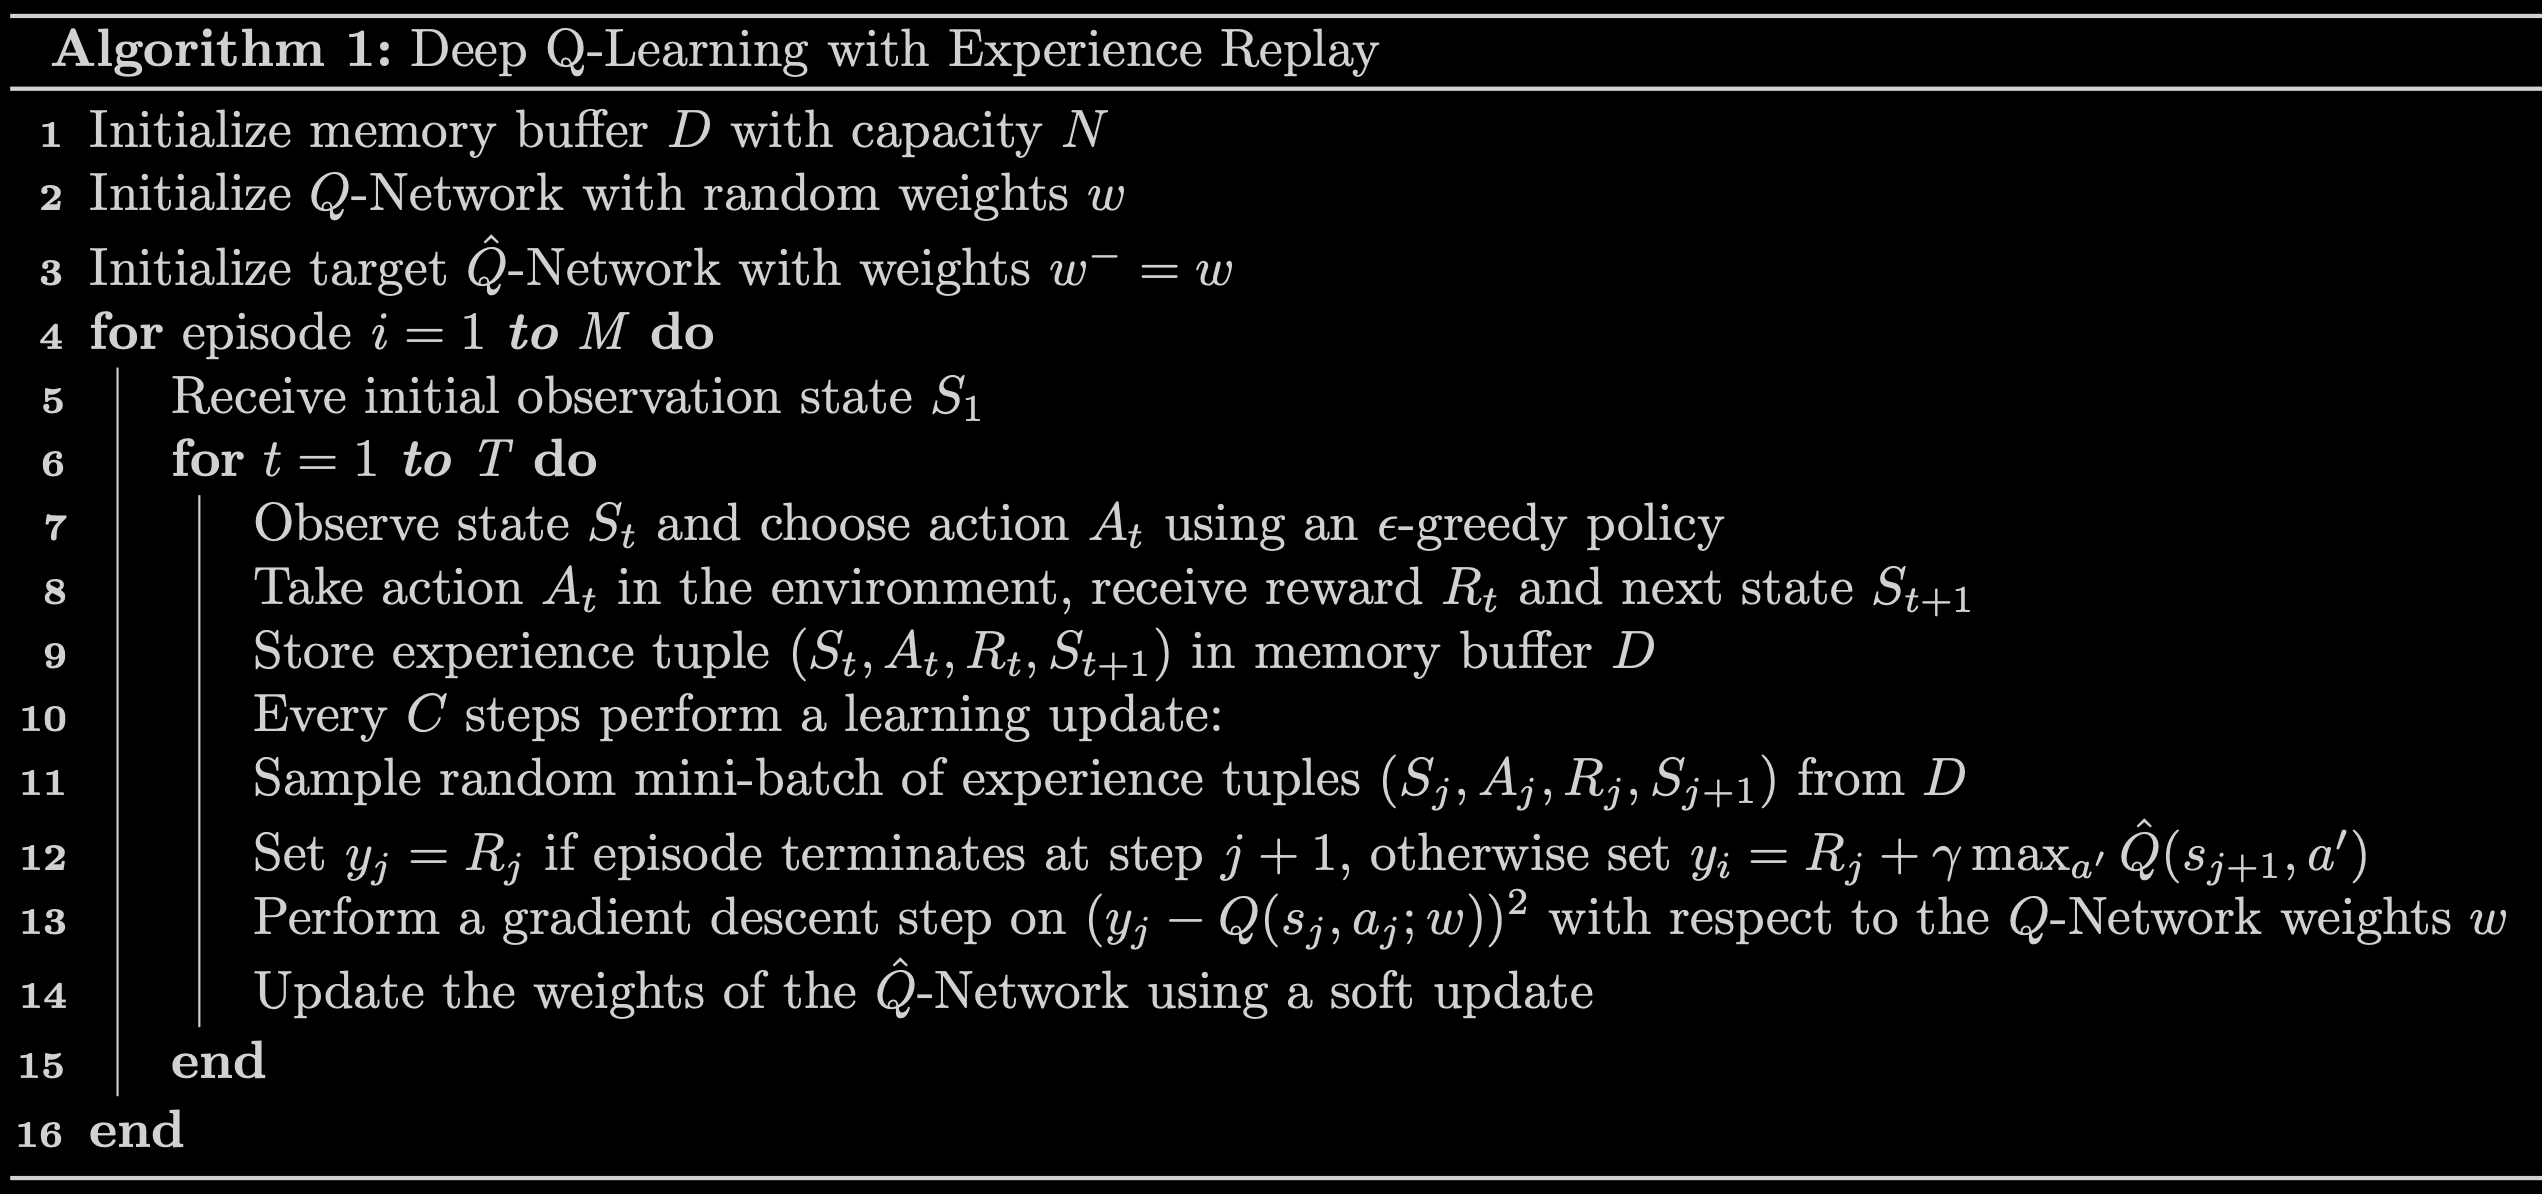

**Note:** With this notebook's default parameters, the following cell takes between 10 to 15 minutes to run. 

In [ ]:

import random

SEED = 0  # Seed for the pseudo-random number generator.
random.seed(SEED)

MINIBATCH_SIZE = 64  # Mini-batch size.
E_DECAY = 0.995  # ε-decay rate for the ε-greedy policy.
E_MIN = 0.01  # Minimum ε value for the ε-greedy policy.

In [ ]:
def get_new_eps(epsilon):
    """
    Updates the epsilon value for the ε-greedy policy.
    
    Gradually decreases the value of epsilon towards a minimum value (E_MIN) using the
    given ε-decay rate (E_DECAY).

    Args:
        epsilon (float):
            The current value of epsilon.

    Returns:
       A float with the updated value of epsilon.
    """

    return max(E_MIN, E_DECAY * epsilon)

In [ ]:
def get_experiences(memory_buffer):
    """
    Returns a random sample of experience tuples drawn from the memory buffer.

    Retrieves a random sample of experience tuples from the given memory_buffer and
    returns them as TensorFlow Tensors. The size of the random sample is determined by
    the mini-batch size (MINIBATCH_SIZE). 
    
    Args:
        memory_buffer (deque):
            A deque containing experiences. The experiences are stored in the memory
            buffer as namedtuples: namedtuple("Experience", field_names=["state",
            "action", "reward", "next_state", "done"]).

    Returns:
        A tuple (states, actions, rewards, next_states, done_vals) where:

            - states are the starting states of the agent.
            - actions are the actions taken by the agent from the starting states.
            - rewards are the rewards received by the agent after taking the actions.
            - next_states are the new states of the agent after taking the actions.
            - done_vals are the boolean values indicating if the episode ended.

        All tuple elements are TensorFlow Tensors whose shape is determined by the
        mini-batch size and the given Gym environment. For the Lunar Lander environment
        the states and next_states will have a shape of [MINIBATCH_SIZE, 8] while the
        actions, rewards, and done_vals will have a shape of [MINIBATCH_SIZE]. All
        TensorFlow Tensors have elements with dtype=tf.float32.
    """

    experiences = random.sample(memory_buffer, k=MINIBATCH_SIZE)
    states = tf.convert_to_tensor(
        np.array([e.state for e in experiences if e is not None]), dtype=tf.float32
    )
    actions = tf.convert_to_tensor(
        np.array([e.action for e in experiences if e is not None]), dtype=tf.float32
    )
    rewards = tf.convert_to_tensor(
        np.array([e.reward for e in experiences if e is not None]), dtype=tf.float32
    )
    next_states = tf.convert_to_tensor(
        np.array([e.next_state for e in experiences if e is not None]), dtype=tf.float32
    )
    done_vals = tf.convert_to_tensor(
        np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
        dtype=tf.float32,
    )
    return (states, actions, rewards, next_states, done_vals)

In [ ]:
def check_update_conditions(t, num_steps_upd, memory_buffer):
    """
    Determines if the conditions are met to perform a learning update.

    Checks if the current time step t is a multiple of num_steps_upd and if the
    memory_buffer has enough experience tuples to fill a mini-batch (for example, if the
    mini-batch size is 64, then the memory buffer should have more than 64 experience
    tuples in order to perform a learning update).
    
    Args:
        t (int):
            The current time step.
        num_steps_upd (int):
            The number of time steps used to determine how often to perform a learning
            update. A learning update is only performed every num_steps_upd time steps.
        memory_buffer (deque):
            A deque containing experiences. The experiences are stored in the memory
            buffer as namedtuples: namedtuple("Experience", field_names=["state",
            "action", "reward", "next_state", "done"]).

    Returns:
       A boolean that will be True if conditions are met and False otherwise. 
    """

    if (t + 1) % num_steps_upd == 0 and len(memory_buffer) > MINIBATCH_SIZE:
        return True
    else:
        return False

In [ ]:
def get_action(q_values, epsilon=0.0):
    """
    Returns an action using an ε-greedy policy.

    This function will return an action according to the following rules:
        - With probability epsilon, it will return an action chosen at random.
        - With probability (1 - epsilon), it will return the action that yields the
        maximum Q value in q_values.
    
    Args:
        q_values (tf.Tensor):
            The Q values returned by the Q-Network. For the Lunar Lander environment
            this TensorFlow Tensor should have a shape of [1, 4] and its elements should
            have dtype=tf.float32. 
        epsilon (float):
            The current value of epsilon.

    Returns:
       An action (numpy.int64). For the Lunar Lander environment, actions are
       represented by integers in the closed interval [0,3].
    """

    if random.random() > epsilon:
        return np.argmax(q_values.numpy()[0])
    else:
        return random.choice(np.arange(4))

In [16]:
from collections import deque
import time

start = time.time()

num_episodes = 2000
max_num_timesteps = 1000

total_point_history = []

num_p_av = 100    # number of total points to use for averaging
epsilon = 1.0     # initial ε value for ε-greedy policy

# Create a memory buffer D with capacity N
memory_buffer = deque(maxlen=MEMORY_SIZE)

# Set the target network weights equal to the Q-Network weights
target_q_network.set_weights(q_network.get_weights())

for i in range(num_episodes):
    
    # Reset the environment to the initial state and get the initial state
    state = env.reset()
    total_points = 0
    
    for t in range(max_num_timesteps):
        
        # From the current state S choose an action A using an ε-greedy policy
        state_qn = np.expand_dims(state, axis=0)  # state needs to be the right shape for the q_network
        q_values = q_network(state_qn)
        action = get_action(q_values, epsilon)
        
        # Take action A and receive reward R and the next state S'
        next_state, reward, done, _ = env.step(action)
        
        # Store experience tuple (S,A,R,S') in the memory buffer.
        # We store the done variable as well for convenience.
        memory_buffer.append(experience(state, action, reward, next_state, done))
        
        # Only update the network every NUM_STEPS_FOR_UPDATE time steps.
        update = check_update_conditions(t, NUM_STEPS_FOR_UPDATE, memory_buffer)
        
        if update:
            # Sample random mini-batch of experience tuples (S,A,R,S') from D
            experiences = get_experiences(memory_buffer)
            
            # Set the y targets, perform a gradient descent step,
            # and update the network weights.
            agent_learn(experiences, GAMMA)
        
        state = next_state.copy()
        total_points += reward
        
        if done:
            break
            
    total_point_history.append(total_points)
    av_latest_points = np.mean(total_point_history[-num_p_av:])
    
    # Update the ε value
    epsilon = get_new_eps(epsilon)

    print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}", end="")

    if (i+1) % num_p_av == 0:
        print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}")

    # We will consider that the environment is solved if we get an
    # average of 200 points in the last 100 episodes.
    if av_latest_points >= 200.0:
        print(f"\n\nEnvironment solved in {i+1} episodes!")
        q_network.save('lunar_lander_model.h5')
        break
        
tot_time = time.time() - start

print(f"\nTotal Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)")

Episode 100 | Total point average of the last 100 episodes: -150.85
Episode 200 | Total point average of the last 100 episodes: -106.11
Episode 300 | Total point average of the last 100 episodes: -77.256
Episode 400 | Total point average of the last 100 episodes: -25.01
Episode 500 | Total point average of the last 100 episodes: 159.91
Episode 534 | Total point average of the last 100 episodes: 201.37

Environment solved in 534 episodes!

Total Runtime: 704.69 s (11.74 min)


We can plot the point history to see how our agent improved during training.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_history(point_history, **kwargs):
    """
    Plots the total number of points received by the agent after each episode together
    with the moving average (rolling mean). 

    Args:
        point_history (list):
            A list containing the total number of points the agent received after each
            episode.
        **kwargs: optional
            window_size (int):
                Size of the window used to calculate the moving average (rolling mean).
                This integer determines the fixed number of data points used for each
                window. The default window size is set to 10% of the total number of
                data points in point_history, i.e. if point_history has 200 data points
                the default window size will be 20.
            lower_limit (int):
                The lower limit of the x-axis in data coordinates. Default value is 0.
            upper_limit (int):
                The upper limit of the x-axis in data coordinates. Default value is
                len(point_history).
            plot_rolling_mean_only (bool):
                If True, only plots the moving average (rolling mean) without the point
                history. Default value is False.
            plot_data_only (bool):
                If True, only plots the point history without the moving average.
                Default value is False.
    """

    lower_limit = 0
    upper_limit = len(point_history)

    window_size = (upper_limit * 10) // 100

    plot_rolling_mean_only = False
    plot_data_only = False

    if kwargs:
        if "window_size" in kwargs:
            window_size = kwargs["window_size"]

        if "lower_limit" in kwargs:
            lower_limit = kwargs["lower_limit"]

        if "upper_limit" in kwargs:
            upper_limit = kwargs["upper_limit"]

        if "plot_rolling_mean_only" in kwargs:
            plot_rolling_mean_only = kwargs["plot_rolling_mean_only"]

        if "plot_data_only" in kwargs:
            plot_data_only = kwargs["plot_data_only"]

    points = point_history[lower_limit:upper_limit]

    # Generate x-axis for plotting.
    episode_num = [x for x in range(lower_limit, upper_limit)]

    # Use Pandas to calculate the rolling mean (moving average).
    rolling_mean = pd.DataFrame(points).rolling(window_size).mean()

    plt.figure(figsize=(10, 7), facecolor="white")

    if plot_data_only:
        plt.plot(episode_num, points, linewidth=1, color="cyan")
    elif plot_rolling_mean_only:
        plt.plot(episode_num, rolling_mean, linewidth=2, color="magenta")
    else:
        plt.plot(episode_num, points, linewidth=1, color="cyan")
        plt.plot(episode_num, rolling_mean, linewidth=2, color="magenta")

    text_color = "black"

    ax = plt.gca()
    ax.set_facecolor("black")
    plt.grid()
    plt.xlabel("Episode", color=text_color, fontsize=30)
    plt.ylabel("Total Points", color=text_color, fontsize=30)
    yNumFmt = mticker.StrMethodFormatter("{x:,}")
    ax.yaxis.set_major_formatter(yNumFmt)
    ax.tick_params(axis="x", colors=text_color)
    ax.tick_params(axis="y", colors=text_color)
    plt.show()

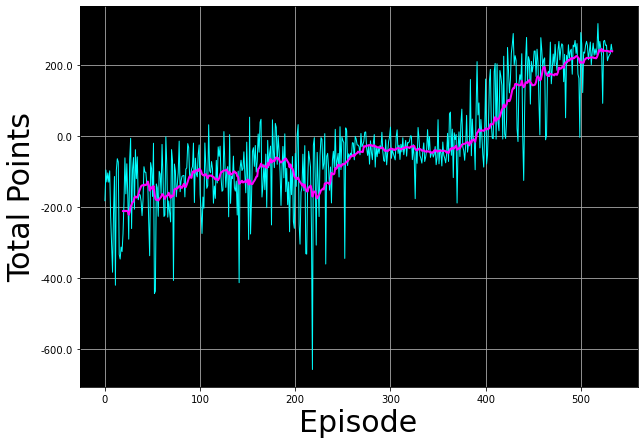

In [17]:
# Plot the point history

plot_history(total_point_history)

<a name="10"></a>
## 10 - See the Trained Agent In Action

Now that we have trained our agent, we can see it in action. We will use the `create_video` function to create a video of our agent interacting with the environment using the trained $Q$-Network. The `create_video` function uses the `imageio` library to create the video. This library produces some warnings that can be distracting, so, to suppress these warnings we run the code below.

In [18]:
# Suppress warnings from imageio
import logging
logging.getLogger().setLevel(logging.ERROR)

In the cell below we create a video of our agent interacting with the Lunar Lander environment using the trained `q_network`. The video is saved to the `videos` folder with the given `filename`. We use the `embed_mp4` function to embed the video in the Jupyter Notebook so that we can see it here directly without having to download it.

We should note that since the lunar lander starts with a random initial force applied to its center of mass, every time you run the cell below you will see a different video. If the agent was trained properly, it should be able to land the lunar lander in the landing pad every time, regardless of the initial force applied to its center of mass.

In [ ]:
import imageio

def create_video(filename, env, q_network, fps=30):
    """
    Creates a video of an agent interacting with a Gym environment.

    The agent will interact with the given env environment using the q_network to map
    states to Q values and using a greedy policy to choose its actions (i.e it will
    choose the actions that yield the maximum Q values).
    
    The video will be saved to a file with the given filename. The video format must be
    specified in the filename by providing a file extension (.mp4, .gif, etc..). If you 
    want to embed the video in a Jupyter notebook using the embed_mp4 function, then the
    video must be saved as an MP4 file. 
    
    Args:
        filename (string):
            The path to the file to which the video will be saved. The video format will
            be selected based on the filename. Therefore, the video format must be
            specified in the filename by providing a file extension (i.e.
            "./videos/lunar_lander.mp4"). To see a list of supported formats see the
            imageio documentation: https://imageio.readthedocs.io/en/v2.8.0/formats.html
        env (Gym Environment): 
            The Gym environment the agent will interact with.
        q_network (tf.keras.Sequential):
            A TensorFlow Keras Sequential model that maps states to Q values.
        fps (int):
            The number of frames per second. Specifies the frame rate of the output
            video. The default frame rate is 30 frames per second.  
    """

    with imageio.get_writer(filename, fps=fps) as video:
        done = False
        state = env.reset()
        frame = env.render(mode="rgb_array")
        video.append_data(frame)
        while not done:
            state = np.expand_dims(state, axis=0)
            q_values = q_network(state)
            action = np.argmax(q_values.numpy()[0])
            state, _, done, _ = env.step(action)
            frame = env.render(mode="rgb_array")
            video.append_data(frame)

In [ ]:
filename = "./videos/lunar_lander.mp4"

create_video(filename, env, q_network)

In [19]:
import IPython
import base64

def embed_mp4(filename):
    """
    Embeds an MP4 video file in a Jupyter notebook.
    
    Args:
        filename (string):
            The path to the the MP4 video file that will be embedded (i.e.
            "./videos/lunar_lander.mp4").
    
    Returns:
        Returns a display object from the given video file. This will result in the
        video being displayed in the Jupyter Notebook.
    """

    video = open(filename, "rb").read()
    b64 = base64.b64encode(video)
    tag = """
    <video width="840" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>""".format(
        b64.decode()
    )
    return IPython.display.HTML(tag)

embed_mp4(filename)

<a name="11"></a>
## 11 - Congratulations!

You have successfully used Deep Q-Learning with Experience Replay to train an agent to land a lunar lander safely on a landing pad on the surface of the moon. Congratulations!

<a name="12"></a>
## 12 - References

If you would like to learn more about Deep Q-Learning, we recommend you check out the following papers.


* Mnih, V., Kavukcuoglu, K., Silver, D. et al. Human-level control through deep reinforcement learning. Nature 518, 529–533 (2015).


* Lillicrap, T. P., Hunt, J. J., Pritzel, A., et al. Continuous Control with Deep Reinforcement Learning. ICLR (2016).


* Mnih, V., Kavukcuoglu, K., Silver, D. et al. Playing Atari with Deep Reinforcement Learning. arXiv e-prints.  arXiv:1312.5602 (2013).

In [ ]:
#### UNIT TESTS
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import numpy as np

def test_network(target):
    num_actions = 4
    state_size = 8
    i = 0
    assert len(target.layers) == 3, f"Wrong number of layers. Expected 3 but got {len(target.layers)}"
    assert target.input.shape.as_list() == [None, state_size], \
        f"Wrong input shape. Expected [None,  400] but got {target.input.shape.as_list()}" 
    expected = [[Dense, [None, 64], relu],
                [Dense, [None, 64], relu],
                [Dense, [None, num_actions], linear]]

    for layer in target.layers:
        assert type(layer) == expected[i][0], \
            f"Wrong type in layer {i}. Expected {expected[i][0]} but got {type(layer)}"
        assert layer.output.shape.as_list() == expected[i][1], \
            f"Wrong number of units in layer {i}. Expected {expected[i][1]} but got {layer.output.shape.as_list()}"
        assert layer.activation == expected[i][2], \
            f"Wrong activation in layer {i}. Expected {expected[i][2]} but got {layer.activation}"
        i = i + 1

    print("\033[92mAll tests passed!")
    
def test_optimizer(target, ALPHA):
    assert type(target) == Adam, f"Wrong optimizer. Expected: {Adam}, got: {target}"
    assert np.isclose(target.learning_rate.numpy(), ALPHA), f"Wrong alpha. Expected: {ALPHA}, got: {target.learning_rate.numpy()}"
    print("\033[92mAll tests passed!")
    
    
def test_compute_loss(target):
    num_actions = 4
    def target_q_network_random(inputs):
        return np.float32(np.random.rand(inputs.shape[0],num_actions))
    
    def q_network_random(inputs):
        return np.float32(np.random.rand(inputs.shape[0],num_actions))
    
    def target_q_network_ones(inputs):
        return np.float32(np.ones((inputs.shape[0], num_actions)))
    
    def q_network_ones(inputs):
        return np.float32(np.ones((inputs.shape[0], num_actions)))
    
    np.random.seed(1)
    states = np.float32(np.random.rand(64, 8))
    actions = np.float32(np.floor(np.random.uniform(0, 1, (64, )) * 4))
    rewards = np.float32(np.random.rand(64, ))
    next_states = np.float32(np.random.rand(64, 8))
    done_vals = np.float32((np.random.uniform(0, 1, size=(64,)) > 0.96) * 1)

    loss = target((states, actions, rewards, next_states, done_vals), 0.995, q_network_random, target_q_network_random)
    

    assert np.isclose(loss, 0.6991737), f"Wrong value. Expected {0.6991737}, got {loss}"

    # Test when episode terminates
    done_vals = np.float32(np.ones((64,)))
    loss = target((states, actions, rewards, next_states, done_vals), 0.995, q_network_ones, target_q_network_ones)
    assert np.isclose(loss, 0.343270182), f"Wrong value. Expected {0.343270182}, got {loss}"
      
    # Test MSE with parameters A = B
    done_vals = np.float32((np.random.uniform(0, 1, size=(64,)) > 0.96) * 1)
    rewards = np.float32(np.ones((64, )))
    loss = target((states, actions, rewards, next_states, done_vals), 0, q_network_ones, target_q_network_ones)
    assert np.isclose(loss, 0), f"Wrong value. Expected {0}, got {loss}"
 
    # Test MSE with parameters A = 0 and B = 1
    done_vals = np.float32((np.random.uniform(0, 1, size=(64,)) > 0.96) * 1)
    rewards = np.float32(np.zeros((64, )))
    loss = target((states, actions, rewards, next_states, done_vals), 0, q_network_ones, target_q_network_ones)
    assert np.isclose(loss, 1), f"Wrong value. Expected {1}, got {loss}"

    print("\033[92mAll tests passed!")
    

In [3]:
# UNIT TEST

test_network(q_network)
test_network(target_q_network)
test_optimizer(optimizer, ALPHA) 
test_compute_loss(compute_loss)

NameError: name 'test_network' is not defined